# Homework N. 1 - 
## Transport Phenomena PGE 381M, Fall 2022
----------------------------------------------------------------
<p> Abraham Montes-Humanez  <br> September 13th, 2022 </p>

<p><strong> (1) Computation of the viscosities of gases at low density </strong> <br>
Predict the viscosities of molecular oxygen, nitrogen and methane at 20°C and atmospheric pressure, and express the results in mPa·s. Compare the results with the experimental data</p>




##### Solution
<p> According to theory developed for low density monoatomic gases (Maxwell / Chapman) and since these are non-polar gases (i.e., the Lennard-Jones estimation of the intermolecular potential energy in terms of characteristic molecular diamater and energy can be used), the viscosity for the 3 instances can be calculated from: </p>

$$
\mu = 2.6693 \times 10^{-5} \frac{\sqrt{MT}}{\sigma^2 \Omega_\mu}
$$

Where $M$ is the molecular weight, $T$ is temperature in Kelvin, $\sigma$ is the characteristic molecular diameter in Å, and $\Omega_\mu$ is a dimensionless number called the collision integral for viscosity (that accounts for the paths the molecular take after binary collisions).
<br>

##### Data

1. Temperature: $T = (20 + 273.15)K = 293.15K$ 
2. Molecular weights: $M_{N_2} = 28.01 g/mol$, $M_{O_2} = 32.00 g/mol$, $M_{{CH}_4} = 16.04 g/mol$ <a name="cite_ref-1"></a>[<sup>[1]</sup>](#cite_note-1)
3. Characteristic diameter: $\sigma_{N_2} = 3.667 Å$, $\sigma_{O_2} = 3.433 Å$, $\sigma_{{CH}_4} = 3.780 Å$ <a name="cite_ref-1"></a>[<sup>[1]</sup>](#cite_note-1)
4. $\epsilon / \kappa$ ratio: ${\left (\frac{\epsilon}{\kappa} \right)} _{N_2}=99.8 K$, ${\left (\frac{\epsilon}{\kappa} \right)} _{O_2}=113.0 K$, ${\left (\frac{\epsilon}{\kappa} \right)} _{{CH}_4}=154.0 K$, being $\kappa = 1.38066 \times 10^{-23} J/K$, the Boltzmann constant <a name="cite_ref-1"></a>[<sup>[1]</sup>](#cite_note-1) <a name="cite_ref-2"></a>[<sup>[2]</sup>](#cite_note-2)



<a name="cite_note-1"></a><p class="footnote">[1](#cite_ref-1) Extracted from table E.1. <a href="https://www.wiley.com/en-us/Transport+Phenomena%2C+Revised+2nd+Edition-p-9780470115398"> Bird, Stewart & Lightfoot, 2007 </a></p>
<a name="cite_note-2"></a><p class="footnote">[2](#cite_ref-2) Extracted from Appendix F, section F.2. <a href="https://www.wiley.com/en-us/Transport+Phenomena%2C+Revised+2nd+Edition-p-9780470115398"> Bird, Stewart & Lightfoot, 2007 </a></p>
<style>
    .footnote {font-size: 13px;}
</style>

In [19]:
#This calculates inverse of the epsilon/kappa times the temperature in Kelvin given by table E1 for N2, O2 and methane respectively.
Temp = 293.15
kappa_epsilon = [Temp/99.8, Temp/113.0, Temp/154.0]
print("kappa/epsilon ratio for N2 is: %5.2f"%kappa_epsilon[0])
print("kappa/epsilon ratio for O2 is: %5.2f"%kappa_epsilon[1])
print("kappa/epsilon ratio for CH4 is: %5.2f"%kappa_epsilon[2])

kappa/epsilon ratio for N2 is:  2.94
kappa/epsilon ratio for O2 is:  2.59
kappa/epsilon ratio for CH4 is:  1.90


Now, from <a name="cite_ref-3"></a>[<sup>[3]</sup>](#cite_note-3), we can calculate the collision integral for viscosity by using the empirical equation: 

$$
\Omega_\mu = \frac{1.16145}{(\kappa T/\epsilon)^{0.14874}} + \frac{0.52487}{e^{0.7732 (\kappa T/\epsilon)}} + \frac{2.16178}{e^{2.43787 (\kappa T/\epsilon)}}
$$



<a name="cite_note-3"></a><p class="footnote">[3](#cite_ref-3) Extracted from table E.2. <a href="https://www.wiley.com/en-us/Transport+Phenomena%2C+Revised+2nd+Edition-p-9780470115398"> Bird, Stewart & Lightfoot, 2007 </a></p>
<style>
    .footnote {font-size: 13px;}
</style>

In [21]:
def omega_mu(tstar):
    import math
    omega = (1.16145/(tstar**(0.14784))) + (0.52487/(math.exp(0.7732*tstar))) + (2.16178/(math.exp(2.43787*tstar)))
    return omega

omegas = [omega_mu(ti) for ti in kappa_epsilon]
print("Collision integral for N2 is: %5.3f"%omegas[0])
print("Collision integral for O2 is: %5.3f"%omegas[1])
print("Collision integral for CH4 is: %5.3f"%omegas[2])


Collision integral for N2 is: 1.046
Collision integral for O2 is: 1.083
Collision integral for CH4 is: 1.197


These values are very close to what table E.2 shows. <a name="cite_ref-3"></a>[<sup>[3]</sup>](#cite_note-3)
<br> Now, the viscosities can be calculated for the 3 gases and they can be expressed in mPa·s as requested using conversion factors <a name="cite_ref-4"></a>[<sup>[4]</sup>](#cite_note-4)


<a name="cite_note-4"></a><p class="footnote">[4](#cite_ref-4) Extracted from table F.3-2 <a href="https://www.wiley.com/en-us/Transport+Phenomena%2C+Revised+2nd+Edition-p-9780470115398"> Bird, Stewart & Lightfoot, 2007 </a></p>
<style>
    .footnote {font-size: 13px;}
</style>

In [22]:
def viscosity(M, T, sigma, omega):
    import math
    mu = 2.6693E-5*(math.sqrt(M*T))/(omega*sigma**2.)
    return mu*1.E+2

M = [28.01, 32.00, 16.04]
sigma=[3.667, 3.433, 3.780]
mu = [viscosity(M[0], Temp, sigma[0], omegas[0]),
      viscosity(M[1], Temp, sigma[1], omegas[1]),
      viscosity(M[2], Temp, sigma[2], omegas[2])]
print("Viscosity of N2 is: %6.4F mPa·s"%mu[0])
print("Viscosity of O2 is: %6.4F mPa·s"%mu[1])
print("Viscosity of CH4 is: %6.4F mPa·s"%mu[2])

Viscosity of N2 is: 0.0172 mPa·s
Viscosity of O2 is: 0.0203 mPa·s
Viscosity of CH4 is: 0.0107 mPa·s


Finally, comparing these values with the experimental data provided in the chapter 1 for $O_2$ and $N_2$ gives the following percentage of discordance:
1. Experimental viscosity of $N_2$ at 300K is: $1.7849 \times 10^{-4} g/cm \cdot s$ or $1.7849 \times 10^{-2} mPa \cdot s$ <a name="cite_ref-5"></a>[<sup>[5]</sup>](#cite_note-5)
2. Experimental viscosity of $O_2$ at 300K is: $2.0712 \times 10^{-4} g/cm \cdot s$ or $2.0712 \times 10^{-2} mPa \cdot s$ <a name="cite_ref-5"></a>[<sup>[5]</sup>](#cite_note-5)
3. Experimental viscosity of ${CH}_4$ at 300K is: $1.1162 \times 10^{-4} g/cm \cdot s$ or $1.1162 \times 10^{-2} mPa \cdot s$ <a name="cite_ref-5"></a>[<sup>[5]</sup>](#cite_note-5)

<a name="cite_note-5"></a><p class="footnote">[5](#cite_ref-5) Extracted from tables 6, 7 and 10 in <a href="https://pubs.acs.org/doi/pdf/10.1021/j150405a004"> Johnston & McCloskey 1939 </a></p>
<style>
    .footnote {font-size: 13px;}
</style>

In [26]:
exps=[1.7849E-2, 2.0712E-2, 1.1162E-2]

print("Difference between experimental viscosity of N2 and estimation by Lennard-Jones under the given conditions is: %3.1F %s"%((abs(mu[0]-exps[0])*100/exps[0]),"%"))
print("Difference between experimental viscosity of O2 and estimation by Lennard-Jones under the given conditions is: %3.1F %s"%((abs(mu[1]-exps[1])*100/exps[1]),"%"))
print("Difference between experimental viscosity of Methane and estimation by Lennard-Jones under the given conditions is: %3.1F %s"%((abs(mu[2]-exps[2])*100/exps[2]),"%"))

Difference between experimental viscosity of N2 and estimation by Lennard-Jones under the given conditions is: 3.7 %
Difference between experimental viscosity of O2 and estimation by Lennard-Jones under the given conditions is: 2.2 %
Difference between experimental viscosity of Methane and estimation by Lennard-Jones under the given conditions is: 4.1 %


------------------------------------------------------------------------------------

<strong> (2) Estimation of Liquid Viscosity </strong> <br>

Estimate the viscosity of saturated liquid water at 0°C and at 100°C by means of Equation 1.5-9 with $\Delta \hat{U}_{vap} = 897.5 BTU/lb_m$ at 100°C and Equation 1.5-11. Compare results with values in table 1.1-2.


##### Solution
<p> According to theory developed by Erying for the viscosity of liquids (molecules in cages in constant movement, occupying vacant spaces), the viscosity can be calculated as: </p>

$$
\mu_{Eq. 1.5-9} = \frac{\tilde{N} h}{\tilde{V}}e^{0.408 \Delta \hat{U}_{vap}/RT}
$$
$$
\mu_{Eq. 1.5-11} = \frac{\tilde{N} h}{\tilde{V}}e^{3.8T_b/T}
$$

Where $\tilde{N}=6.02214 \times 10^{23} molecules/g \cdot mol$ is the Avogadro's number; $h=6.62608 \times 10^{-34} J \cdot s$ is the Planck's constant; and $R = 8.31451 J/g-mol \cdot K$ is the gas law contant.

<br>

#### Data: 

1. ${\left (\tilde{V}_{water} \right)}_{0°C} \approx 18.0150 cc/g-mol$, since its density is $~1 g/cc$ and its molar weight is $18.015 g/mol$ <a name="cite_ref-6"></a>[<sup>[6]</sup>](#cite_note-6)
2. ${\left (\tilde{V}_{water} \right)}_{100°C} \approx 18.7921 cc/g-mol$, since its density is $0.95865 g/cc$ and its molar weight is $18.015 g/mol$ <a name="cite_ref-6"></a>[<sup>[6]</sup>](#cite_note-6)
3. $R=1.98721 cal/g-mol \cdot K$ <a name="cite_ref-7"></a>[<sup>[7]</sup>](#cite_note-7)
4. $\tilde{N}=6.02214 \times 10^{23} molec/g-mol$ <a name="cite_ref-7"></a>[<sup>[7]</sup>](#cite_note-7)
5. $h=6.62608 \times 10^{-27} erg \cdot s$ <a name="cite_ref-7"></a>[<sup>[7]</sup>](#cite_note-7)

<a name="cite_note-6"></a><p class="footnote">[6](#cite_ref-6) Extracted from <a href="https://www.usgs.gov/special-topics/water-science-school/science/water-density"> USGS </a></p>
<a name="cite_note-7"></a><p class="footnote">[7](#cite_ref-7) Extracted from appendix F in <a href="https://www.wiley.com/en-us/Transport+Phenomena%2C+Revised+2nd+Edition-p-9780470115398"> Bird, Stewart & Lightfoot, 2007 </a></p>
<style>
    .footnote {font-size: 13px;}
</style>

In [50]:
def viscosity_liquid(T, molarV, Tb=373.15, internalE=0, boiling=False):
    import math
    avogadro=6.02214E+23 #molec/g-mol
    planck=6.62608E-27 #erg s, where erg=g cm2/s2
    R=1.98721 #cal/g-mol K
    if boiling:
        return avogadro*planck*(math.exp(3.8*Tb/T))/molarV
    else:
        return avogadro*planck*(math.exp(0.408*internalE/(R*T)))/(molarV)
    
mu1a=viscosity_liquid(273.15, 18.015, internalE=897.5*18.015*2.5216E+2/453.6, boiling=False) #There is a g-mol that remains from R. Then, DU MUST be multiplied by the water's mass in grams per mol
mu1b=viscosity_liquid(373.15, 18.7921, internalE=897.5*18.015*2.5216E+2/453.6, boiling=False)
mu2a=viscosity_liquid(273.15, 18.015, internalE=897.5*18.015*2.5216E+2/453.6, boiling=True)
mu2b=viscosity_liquid(373.15, 18.7921, internalE=897.5*18.015*2.5216E+2/453.6, boiling=True)

print("The viscosity of water at 0°C with equation 1.5-9 and the internal energy provided is: %6.4F cp"%(mu1a*100)) #Mu alone is in poise
print("The viscosity of water at 100°C with equation 1.5-9 and the internal energy provided is: %6.4F cp"%(mu1b*100))
print("The viscosity of water at 0°C with equation 1.5-11 and the internal energy provided is: %6.4F cp"%(mu2a*100))
print("The viscosity of water at 100°C with equation 1.5-11 and the internal energy provided is: %6.4F cp"%(mu2b*100))

print("Compared with the value in table 1.1-2 (at 100°C viscosity of liquid water is 0.2821 cp), the difference with calculations from eq. 1.5-9 and 1.5-11 are: %5.2F %s and %5.2F %s respectively"%(abs(mu1b*100-0.2821)*100/0.2821, "%", abs(0.2821-mu2b*100)*100/0.2821, "%"))
print("Compared with the value in table 1.1-2 (at 0°C viscosity of liquid water is 1.787 cp), the difference with calculations from eq. 1.5-9 and 1.5-11 are: %5.2F %s and %5.2F %s respectively"%(abs(mu1a*100-1.787)*100/1.787, "%", abs(1.787-mu2a*100)*100/1.787, "%"))

The viscosity of water at 0°C with equation 1.5-9 and the internal energy provided is: 19.0305 cp
The viscosity of water at 100°C with equation 1.5-9 and the internal energy provided is: 2.9841 cp
The viscosity of water at 0°C with equation 1.5-11 and the internal energy provided is: 3.9799 cp
The viscosity of water at 100°C with equation 1.5-11 and the internal energy provided is: 0.9492 cp
Compared with the value in table 1.1-2 (at 100°C viscosity of liquid water is 0.2821 cp), the difference with calculations from eq. 1.5-9 and 1.5-11 are: 957.81 % and 236.47 % respectively
Compared with the value in table 1.1-2 (at 0°C viscosity of liquid water is 1.787 cp), the difference with calculations from eq. 1.5-9 and 1.5-11 are: 964.94 % and 122.71 % respectively


From the result of the previous exercise, the equations 1.5-9 and 1.5-11 give really poor predictions for the viscosity of water at 0 and 100 °C.

----------------------------------------------------------------


<strong> (3) Lennard-Jones </strong> <br>

a.	In your favorite software package, plot both Lennard-Jones potential and the corresponding intermolecular force $F(r)$. Normalize your distance by parameter $\sigma$, and potential by $\epsilon$. Label the regions of repulsion and attraction on the graph, and calculate the limiting value of intermolecular separation $r_m$. Calculate separation for which the normalized force value is equal 0.01.


##### Solution
<p> According to the approximation proposed by Lennard-Jones for non-polar molecules: </p>

$$ 
\phi(\hat{r})|_{norm.}=4 \left [ \left ( {\frac{1}{\hat r}} \right)^{12} - \left ({\frac{1}{\hat r}} \right)^6 \right]
$$

Where $\phi(\hat{r})|_{norm.}$ is the potential energy normalized by the characteristic energy, $\hat{r}=\frac{r}{\sigma}$ and the intermolecular force is: $F(r)=-\frac{d\phi}{dr}$




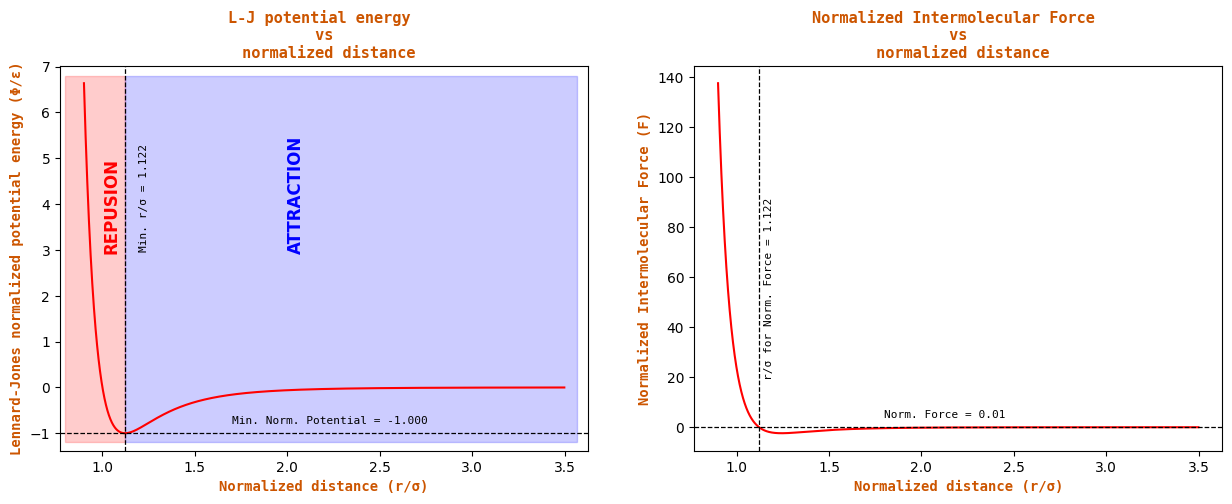

In [128]:
import numpy as np
import matplotlib.pyplot as plt

step = 0.001
ratio = np.arange(.9,3.5,step) #ratio would be the distance normalized by the characteristic diameter.

def potential(ratio):      
    #ratio is distanced normalized by the characteristic diameter.
    return 4.*((1/ratio)**12. - (1/ratio)**6.)

def F(potentials, step):   
    #potentials is a np array with the potentials in terms of the ratio distance to characteristic diameter.
    #step is the steps (MUST be constant) of the ratio (dist. to sigma) used to calculate the array of potentials
    import numpy as np
    p2 = np.roll(potentials,-1).copy()
    buffer = (p2-potentials)/step
    buffer = np.delete(buffer,-1)
    return -buffer


potentials = potential(ratio)
forces = F(potentials,step)
minpot=np.min(potentials) #This calculates the minimum potential
rm=ratio[np.argmin(potentials)]   #This will calculate the ratio at which the minimum potential occurs, and attraction between molecules start to take over
f001=np.argmin(abs(forces-.01))
rmf001=ratio[f001]

#Plotting:
getfont=lambda s: {
    'family':'monospace',
    'size':s,
    'weight':'bold',
    'color': '#CC5500'
}

getfonttxt=lambda s: {
    'family':'monospace',
    'size':s,
    'weight':'normal',
    'color': 'black'
}

fig,axs = plt.subplots(
    1,2,figsize=(15,5),
    #gridspec_kw={'width_ratios':[1,1,3]},
    )
axs[0].plot(ratio,potentials,color='red',lw=1.5,ls='-')
axs[0].set_title('L-J potential energy \n vs \n normalized distance', fontdict=getfont(11))
axs[0].set_xlabel('Normalized distance (r/σ)', fontdict=getfont(10))
axs[0].set_ylabel('Lennard-Jones normalized potential energy (Φ/ε)', fontdict=getfont(10))
axs[0].axhline(y=minpot, ls='--', lw=0.9, c='k')
axs[0].axvline(x=rm, ls='--', lw=0.9, c='k')
axs[0].text(s='Min. r/σ = %5.3f'%rm, x=1.2, y=3, rotation=90,fontdict=getfonttxt(8))
axs[0].text(s='Min. Norm. Potential = %5.3f'%minpot, x=1.7, y=-.8, rotation=0,fontdict=getfonttxt(8))
axs[0].text(s='REPUSION', x=1.0, y=3, rotation=90,fontdict={'color':'red', 'weight':'bold', 'size':12})
axs[0].text(s='ATTRACTION', x=2, y=3, rotation=90,fontdict={'color':'blue', 'weight':'bold', 'size':12})
rect1=plt.Rectangle(xy=(0.8,-1.2), width=.32, height=8, angle=0.0, color='red', alpha=0.2)
rect2=plt.Rectangle(xy=(0.8+.32,-1.2), width=2.45, height=8, angle=0.0, color='blue', alpha=0.2)
axs[0].add_patch(rect1)
axs[0].add_patch(rect2)

axs[1].plot(np.delete(ratio,-1).copy(),forces,color='red',lw=1.5,ls='-')
axs[1].set_title('Normalized Intermolecular Force \n vs \n normalized distance', fontdict=getfont(11))
axs[1].set_xlabel('Normalized distance (r/σ)', fontdict=getfont(10))
axs[1].set_ylabel('Normalized Intermolecular Force (F)', fontdict=getfont(10));
axs[1].axhline(y=0.001, ls='--', lw=0.9, c='k')
axs[1].axvline(x=rmf001, ls='--', lw=0.9, c='k')
axs[1].text(s='r/σ for Norm. Force = %5.3f'%rmf001, x=1.15, y=20, rotation=90,fontdict=getfonttxt(8))
axs[1].text(s='Norm. Force = 0.01', x=1.8, y=4, rotation=0,fontdict=getfonttxt(8));

# axs[2].plot(np.delete(potentials,-1).copy(),forces,color='darkblue',lw=1.5,ls='--');
# axs[2].set_title('Normalized intermolecular Force (F) \n vs \n Normalized potential energy (Φ/ε)', fontdict=getfont(11))
# axs[2].set_xlabel('Lennard-Jones normalized potential energy (Φ/ε)', fontdict=getfont(10))
# axs[2].set_ylabel('Normalized Intermolecular Force (F)', fontdict=getfont(10));



b.	What are the physical meanings of the Lennard-Jones parameters? Can they be uniquely determined from viscosity measurements? Explain.
##### Solution

According to the Pauli's principle (pairs of electrons cannot share the same space), when 2 molecules are close enough, they will begin to repel each other <a name="cite_ref-8"></a>[<sup>[8]</sup>](#cite_note-8). The characteristic energy $\epsilon$, also referred to as well depth is the amount of negative potential energy between 2 molecules at which attraction begins to govern the interaction <a name="cite_ref-9"></a>[<sup>[9]</sup>](#cite_note-9). On the other hand, the characteristic diameter $\sigma$, that appears in the literature also as $r_0$ or $\sigma_0$ is simply the separation between molecules at which the potential energy is 0 (i.e., $\phi=0$). <br>

The Lennard-Jones parameters can indeed be determined from viscosity measurements as Monchick & Mason <a name="cite_ref-10"></a>[<sup>[10]</sup>](#cite_note-10) did on their work, and Silbey <a name="cite_ref-11"></a>[<sup>[11]</sup>](#cite_note-11) mentions: "(...) The values of $\epsilon$ and $\sigma$ can be found by fitting experimental data on the second virial coefficient, gas viscosity, and molecular beam scattering cross sections.". This, because viscosity can be written in terms of Lennard-Jones parameters as in equation: $\mu = 2.6693 \times 10^{-5} \frac{\sqrt{MT}}{\sigma^2 \Omega_\mu}$.

c. The Lennard-Jones potential depends only on the intermolecular separation. For what kinds of molecules would this be in-appropriate
##### Solution

As stated by Atkins and DePaula <a name="cite_ref-9"></a>[<sup>[9]</sup>](#cite_note-9), the Lennard-Jones potential is a case of the Mie-potential in which the repulsive potential is taken to be to the power of 12 and the attraction term to the power of 6. This is a very good approximation for <strong> non-polar gases </strong> and <strong> spherical molecules </strong>. Working with polar molecules would require the addition of an additional term to account for pole-interactions, such as the one described by Monchick & Mason <a name="cite_ref-10"></a>[<sup>[10]</sup>](#cite_note-10). Moreover, as a case of Mie-potential, it assumes that the potential goes to infinity when the molecules come enough close to each other (this is referred to as "hard-sphere model"). There is plenty of evidence that the repulsive term of the equation does not actually provide a good representation of the repulsive forces undergoing the interactions of molecules close to each other <a name="cite_ref-9"></a>[<sup>[9]</sup>](#cite_note-9).

<a name="cite_note-8"></a><p class="footnote">[8](#cite_ref-8) Maghfiroh, Arkundat and Maulina 2020 <a href="10.1088/1742-6596/1491/1/012022"> doi:10.1088/1742-6596/1491/1/012022 </a></p>
<a name="cite_note-9"></a><p class="footnote">[9](#cite_ref-9) Physical Chem. 8th Ed. <a href="https://global.oup.com/ukhe/product/atkins-physical-chemistry-9780198847816?cc=us&lang=en"> Atkins and DePaula, 2006 </a></p>
<a name="cite_note-10"></a><p class="footnote">[10](#cite_ref-10) Monchick & Mason, 1961 <a href="https://doi.org/10.1063/1.1732363"> doi:10.1063/1.1732363 </a></p>
<a name="cite_note-11"></a><p class="footnote">[11](#cite_ref-11) Physical Chem. 4th Ed. <a href="https://www.wiley.com/en-us/Physical+Chemistry,+4th+Edition-p-9780471215042"> Silbey, Alberti and Bawendi 2004 </a></p>

<style>
    .footnote {font-size: 13px;}
</style>

------------------------------------------------------------------------

<strong> (4) Flux problem </strong> <br>

A carbon dioxide injection well is injecting $30 MMSCFD$ into an aquifer that is at $1250m$ depth and is $260 m$ thick. The density of the $CO_2$ under aquifer conditions is $700 kg/m^3$. The well is vertical and completed from top to bottom of the aquifer, so you may assume steady radial flow.
<br>

a. What is the flux of $CO_2$ at a distance $r = 15m$ from the wellbore? Make sure your answer has appropriate dimensions, i.e. mass per unit area per unit time
<br>

b. The transport coefficient relating flux of $CO_2$ and gradient in potential driving the flux is $2.5 \times 10^{-8} kg/m/s/Pa$. What is the gradient in potential at a distance $r=15m$ from the wellbore?


##### Solution
<p> Below, there is a graphical representation of the problem.  </p>

<img src="hw1.png" width=500px/>

To determine the flux, we only divide the mass injection rate (obtaining mass by multiplying flow by the $CO_2$ density and converting to $m^3/day$, so we are consistent with units) by the area at 15 m from the wellbore, which would be $2\pi (15m) (260m) = 24504.4 m^2$. 
<br>

Furthermore, since $\tau_r = -\mu \frac{dv_r}{dt}$, being the $r$ subindex related to the radial direction, then the gradient is the flux divided by the coefficient provided by the problem. Besides, the radial velocity has the same direction as the momentum transport, thus the gradient should be positive. Some units conversions are made to keep consistency. <br>

Note that the flux has equivalent units $kg/m^2 s$ and the $Pa$ in the coefficient is equivalent to $N/m = kg/m \cdot s^2$. Thus, there is no further conversion needed to obtain the gradient in $m/s^2$.

In [14]:
import math
flux = (700*30E+6*.304854**3.)/(86400*260*2*math.pi*15)
print("The flux is %5.4F kg/m2 s"%flux)
grad = flux/(2.5E-8)
print("The magnitude of the gradient is %5.2E m/s2"%grad)


The flux is 0.2810 kg/m2 s
The magnitude of the gradient is 1.12E+07 m/s2


-----------------------------

<strong> (5) The wall collision frequency </strong> <br>

It is desired to find the frequency Z with which the molecules in an ideal gas strike a unit area of a wall from one side only. The gas is at rest and equilibrium with a temperture T and the number density of molecules is $n$. All molecules have a mass $m$. All molecules in the region $x<0$ with $u_x>0$ will hit an area $S$ in the $yz$-plane in a short time $\Delta t$ if they are in a volume $Su_x\Delta t$. The number of wall collisions per unit area per unit time will be:

$$
Z=\frac{\int_{-\infty}^{+\infty} \int_{-\infty}^{+\infty} \int_0^{+\infty} (Su_x\Delta t)f(u_x, u_y, u_z)du_xdu_ydu_z}{S\Delta t} \tag{0}
$$

Verify the development to reach $Z=n\sqrt{\frac{\kappa T}{2\pi m}} = n\bar u/4$.

##### Solution
According to <a name="cite_ref-12"></a>[<sup>[12]</sup>](#cite_note-12), the Maxwell-Boltzmann distribution of molecules velocities is given by:
$$
f(u_x, u_y, u_z) = n \left ( {\frac{m}{2\pi \kappa T}} \right)^{3/2} e^{\frac{-mu^2}{2\kappa T}} \tag{i}
$$

in which $u$ is the veolcity.  

Let us call $\psi=m/{2\kappa T}$. So the equation (i) can be rewritten as: 
$$
f(u_x, u_y, u_z) = n \left ( {\frac{\psi}{\pi}} \right)^{3/2} e^{-\psi u^2} \tag{ii}
$$

Given that the dot product $u \cdot u = u^2$ gives the scalar: $u_x^2 + u_y^2 + u_z^2$, the exponential in (ii) can be reorganized conveniently as: $e^{-\psi u_x^2} e^{-\psi u_y^2} e^{-\psi u_z^2}$. Thus, the triple integral in (0) becomes: $\

$$
Z=(S\Delta t) \frac{\int_{-\infty}^{+\infty} \int_{-\infty}^{+\infty} \int_0^{+\infty} u_x {n \left (  {\frac{\psi}{\pi}} \right)^{3/2} e^{-\psi u_x^2} e^{-\psi u_y^2} e^{-\psi u_z^2}}du_xdu_ydu_z}{S\Delta t} \tag{iii}
$$

Now, the product $S\Delta t$ cancels out and $\psi$, $n$ and $\pi$ can be pulled out of the integrals, as they do not depend on the molecular velocity: 

$$
Z={n \left (  {\frac{\psi}{\pi}} \right)^{3/2}}{\int_{-\infty}^{+\infty} \int_{-\infty}^{+\infty} \int_0^{+\infty} u_x { e^{-\psi u_x^2} e^{-\psi u_y^2} e^{-\psi u_z^2}}du_xdu_ydu_z} \tag{iv}
$$

Since $\partial u_i/\partial u_j=0$, for $i,j \in (x,y,z)$ and $i \ne j$, then equation (iv) becomes a product of integrals as follows:

$$
Z={n \left (  {\frac{\psi}{\pi}} \right)^{3/2}} \left ( {\int_{-\infty}^{+\infty} e^{-\psi u_z^2} du_z \int_{-\infty}^{+\infty} e^{-\psi u_y^2} du_y \int_0^{+\infty} u_x { e^{-\psi u_x^2}  }du_x} \right) \tag{v}
$$

Now, note that the integrand in each of these integrals is a symmetric function about the $y$-axis. For instance: $e^{-\psi (-u_z)^2} = e^{-\psi u_z^2}$. Then, $\int_{-\infty}^{+\infty} e^{-\psi u_z^2} = 2{\int_{0}^{+\infty} e^{-\psi u_z^2}}$, and the same applies for $u_y$. Thus, the equation (v) becomes:


$$
Z={n \left (  {\frac{\psi}{\pi}} \right)^{3/2}} \left ( {2 \int_{0}^{+\infty} e^{-\psi u_z^2} du_z  \cdot 2 \int_{0}^{+\infty} e^{-\psi u_y^2} du_y \cdot \int_0^{+\infty} u_x { e^{-\psi u_x^2}  }du_x} \right) \tag{vi}
$$

Now, note that $\int_{0}^{+\infty} e^{-ax^2} dx = \sqrt{\frac{\pi}{4a}}$ and $\int_{0}^{+\infty} x e^{-ax^2} dx = \frac{1}{2a}$. The second can be easily proven by making the following substitution: $u=-ax^2$. Following that substitution, $du=-2axdx$, and then the improper integral becomes: $\int_{-\infty}^{0}  e^{u} du = \frac{-1}{2a} \lim_{t \to -\infty} {(e^t-1)}= {\frac{-1}{2a}}\cdot {-1} = {\frac{1}{2a}}$. Then, equation (vi) becomes: 

$$
Z={n \left (  {\frac{\psi}{\pi}} \right)^{3/2}} \left ( {4 \frac{\pi}{4\psi} \cdot \frac{1}{2\psi}} \right) = \frac{n}{2 \sqrt{\pi \psi}} = \frac{n}{\sqrt{4\pi \psi}} \tag{vii}
$$

Now, we can bring the definition of $\psi$, and (vii) yields:

$$
Z=\frac{n}{\sqrt{4\pi \frac{m}{2\kappa T}}} = n\sqrt{\frac{\kappa T}{2\pi m}} \tag{viii}
$$

Finally, from <a name="cite_ref-13"></a>[<sup>[13]</sup>](#cite_note-13) we know that $\bar u = \int_0^\infty uf(u)du / \int_0^\infty f(u)du = \sqrt{\frac{8\kappa T}{\pi m}}$. Plugging this to equation (viii), we obtain:

$$
Z = n\sqrt{\frac{\kappa T}{2\pi m}} = n\sqrt{\frac{8 \kappa T}{16\pi m}} = \frac{1}{4}n\bar u    \space\space \blacksquare
$$

<a name="cite_note-12"></a><p class="footnote">[12](#cite_ref-12) Peckham & McNaught, 1992 in J. Chem. Educ. 1992, 69, 7, 554 <a href="https://doi.org/10.1021/ed069p554"> doi.org/10.1021/ed069p554 </a></p>
<a name="cite_note-13"></a><p class="footnote">[13](#cite_ref-13) Equation 1.4-1 <a href="https://www.wiley.com/en-us/Transport+Phenomena%2C+Revised+2nd+Edition-p-9780470115398"> Bird, Stewart & Lightfoot, 2007 </a></p>
<style>
    .footnote {font-size: 13px;}
</style>
